#**SPEECH EMOTION RECOGNITION**

**Verbal Communication is valuable and sought after in workplace and classroom environments alike.
There is no denying the notion that Indians lack verbal communication and consequently lag behind in
the workplace or classroom environments. This happens despite them having strong technical
competencies. Clear and comprehensive speech is the vital backbone of strong communication and
presentation skills. Where some occupations consist mainly of presenting, most careers require and
thrive from the ability to communicate effectively. Research has shown that verbal communication
remains one of the most employable skills in both the perception of employers and new graduates. Of
the possible improvements to vocal presentations tone, disfluencies, and stutters, in particular, remain
one of the most common and prominent factors of someone’s demonstration. Millions of people are
affected by stuttering and other speech disfluencies, with the majority of the world having experienced
mild stutters while communicating under stressful conditions. Research shows that mild disfluencies
can be cured without medical help, just practicing speech regularly and constructive feedbacks are
effective ways to improve.
We, Data Scientists recognize this problem and say hello.**

#**Problem Statement**

**We will solve the above-mentioned problem by applying deep learning algorithms to audio/speech
data. The solution will be to identify emotions in speech**

**We have already created processed data using RAVDESS and TESS dataset audio files and saved in csv file in other jupyter notebook named "Load Audio Data". We will be using that csv file for further project.**

#**Importing libraries**

In [1]:
# importing required libraries

import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D,Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from keras.layers import GRU
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from sklearn.metrics import confusion_matrix, classification_report
import librosa
import librosa.display
import IPython
import pickle
from sklearn.pipeline import Pipeline
import joblib
import warnings
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
# loading data using processed data csv file

audio_data = pd.read_csv("/content/drive/MyDrive/Almabetter/processed_data")
audio_data.shape

(5252, 42)

**MFCC was used for extraction of features in the Load Audio Data notebook. Loading the data created using MFCC.**

In [3]:
# checking first 5 rows of the dataframe

audio_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,emotion
0,0,-528.32153,47.173195,2.631435,14.939351,8.193103,3.663567,-9.597747,-4.570041,-3.722132,-5.821703,-2.292574,-4.429954,-3.283939,-0.518842,-1.307410,0.267563,-1.173469,2.301467,-0.126545,4.183552,1.025416,3.447331,-0.049484,3.662800,0.824353,3.799759,1.258937,4.359741,4.169260,6.378294,4.793785,5.910057,1.894006,5.325587,4.023085,5.158941,2.808574,3.295748,1.972312,5.102187,3
1,1,-527.62970,48.368885,-6.187748,13.242492,-0.472389,-0.627818,-3.048116,-3.785497,-9.572919,-3.596772,4.334416,-5.076773,-0.432555,-0.509276,-3.849935,1.288462,-2.679971,-0.755608,-0.329920,-0.971555,-3.069993,0.393442,-2.234776,1.004091,1.745765,3.829570,-0.207324,4.958931,1.975488,3.811447,3.396231,2.278142,1.447686,2.641157,1.362891,4.007977,0.011719,0.814065,-0.266730,2.210508,4
2,2,-680.56590,64.908300,17.960472,23.941381,14.328822,12.681093,2.101332,2.055144,-2.576184,3.079970,-0.118392,-2.075077,3.084237,0.505123,3.033683,6.655987,-1.972009,1.578540,3.175197,1.464963,-2.324510,4.109143,-5.340979,-0.224232,-0.164529,2.152969,-0.122371,3.446125,-1.209258,1.155086,-1.828201,-0.164363,-0.278901,1.772693,-1.331633,1.330674,-3.645186,-1.537878,-4.229579,-0.651406,1
3,3,-555.72230,56.944500,-4.183017,16.818874,4.908437,2.978804,-3.967603,-2.564917,-8.553740,-0.425886,5.742433,-6.308222,1.383288,2.639100,-2.120058,3.112583,-3.274935,0.762563,2.171553,2.242014,-0.945900,0.743926,-2.040370,0.222340,-0.634997,0.792216,-1.776182,2.168432,-1.270737,0.387491,0.488614,-0.859154,0.275535,0.431264,0.120321,3.855029,0.009521,1.464371,-0.419368,1.797345,4
4,4,-611.76540,54.225820,-3.265942,16.220272,2.916856,0.932325,-7.010364,-7.922600,-5.687799,-2.169403,0.475313,-8.617010,1.024009,0.341207,-4.550450,2.318602,-3.804256,-0.090218,1.350664,-0.109125,-4.298742,-3.061666,-3.760662,-1.612138,-5.048974,0.328476,-3.007544,2.674329,-1.574020,1.139760,2.470630,-1.142443,0.525777,2.377189,-0.883754,3.829534,1.228071,1.932130,0.010801,3.185586,5


**Audio files count for variety of emotions**

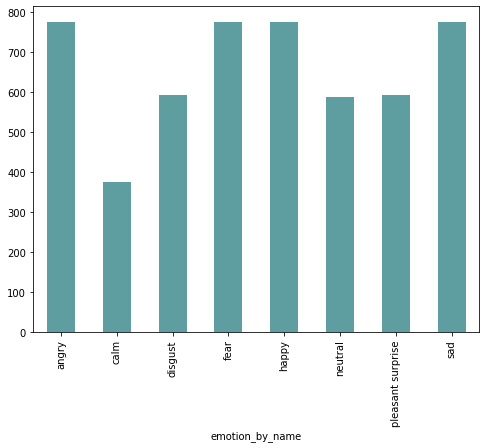

In [4]:
# checking the count of audio files for different emotions

warnings.filterwarnings('ignore')
audio_data_labels = audio_data[['emotion']]
dict_values = {0:"neutral",1:"calm",2:"happy",3:"sad",4:"angry",5:"fear",6:"disgust",7:"pleasant surprise"}
audio_data_labels['emotion_by_name'] = audio_data_labels['emotion'].map(dict_values)
fig, ax = plt.subplots(figsize=(8,6))
#audio_data_labels.groupby('emotion')['emotion'].count().plot(kind='bar', ax=ax)
audio_data_labels.groupby('emotion_by_name')['emotion_by_name'].count().plot(kind='bar', ax=ax,color='cadetblue')


**Wave plot for random audio files**

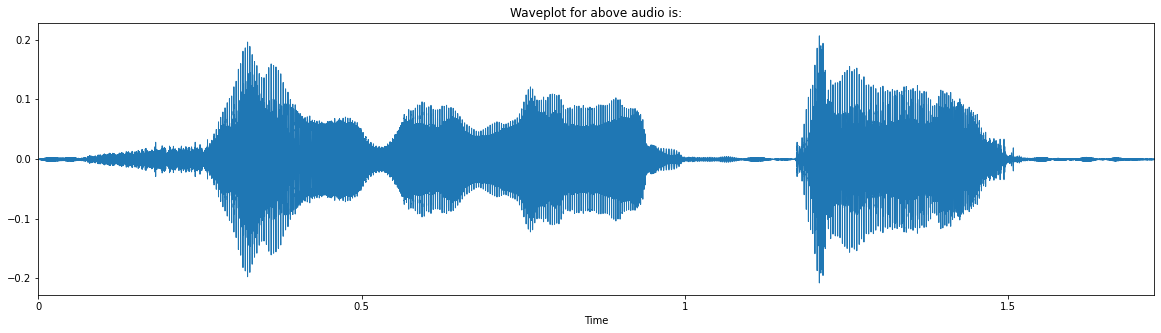

In [5]:
# plotting wave plot for some random audio file (Emotion-fear)

path = "/content/drive/MyDrive/Almabetter/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav"
data, sample_rate = librosa.load(path)
plt.figure(figsize=(20,5))
plt.title("Waveplot for above audio is:")
librosa.display.waveplot(data, sr=sample_rate)

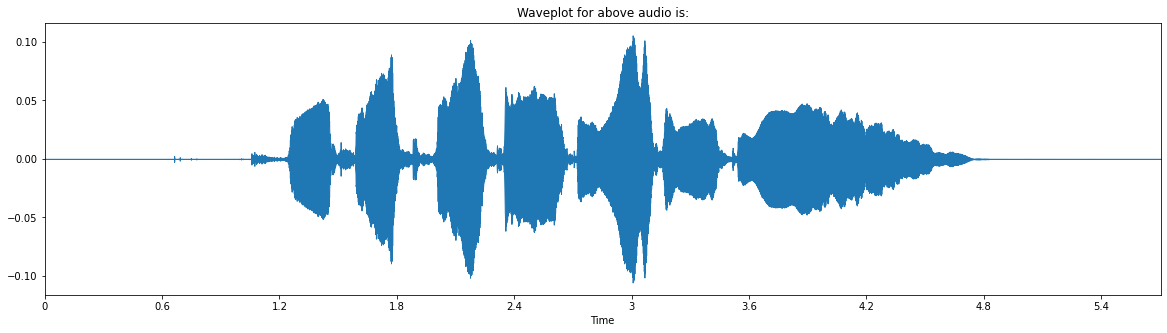

In [6]:
# plotting wave plot for some random audio file (Emotion- Calm)

path = "/content/drive/MyDrive/Almabetter/audio files/song audio files/Actor_02/03-02-02-01-01-01-02.wav"
data, sample_rate = librosa.load(path)
plt.figure(figsize=(20,5))
plt.title("Waveplot for above audio is:")
librosa.display.waveplot(data, sr=sample_rate)

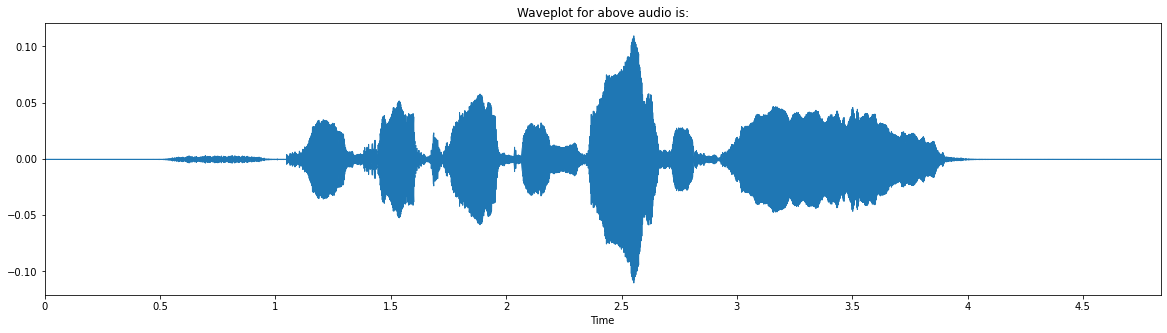

In [7]:
# plotting wave plot for some random audio file (Emotion- Happy)

path = "/content/drive/MyDrive/Almabetter/audio files/song audio files/Actor_06/03-02-03-01-01-01-06.wav"
data, sample_rate = librosa.load(path)
plt.figure(figsize=(20,5))
plt.title("Waveplot for above audio is:")
librosa.display.waveplot(data, sr=sample_rate)

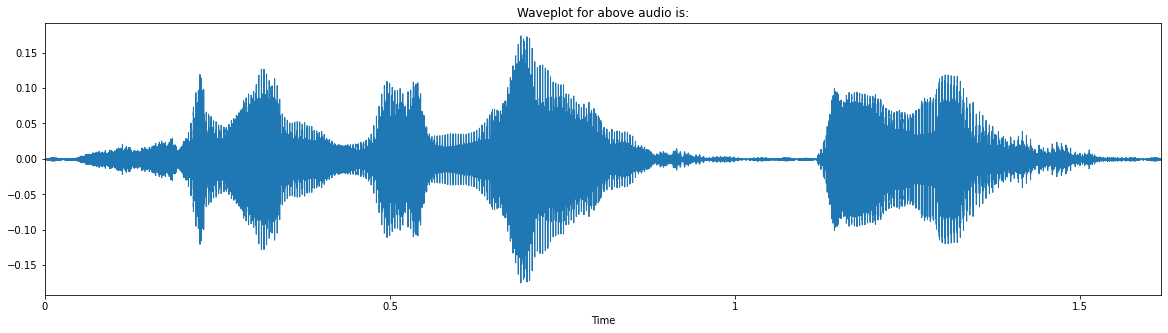

In [8]:
# plotting wave plot for some random audio file (Emotion- Angry)

path = "/content/drive/MyDrive/Almabetter/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav"
data, sample_rate = librosa.load(path)
plt.figure(figsize=(20,5))
plt.title("Waveplot for above audio is:")
librosa.display.waveplot(data, sr=sample_rate)

**Specshow plot for random audio files**

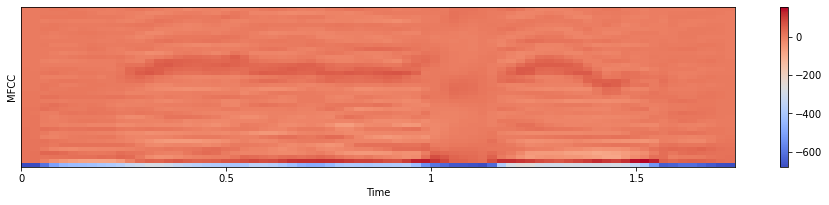

In [9]:
# plotting spec show using mfcc for random audio file (Emotion - Fear)
path = "/content/drive/MyDrive/Almabetter/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav"
X, sample_rate = librosa.load(path)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

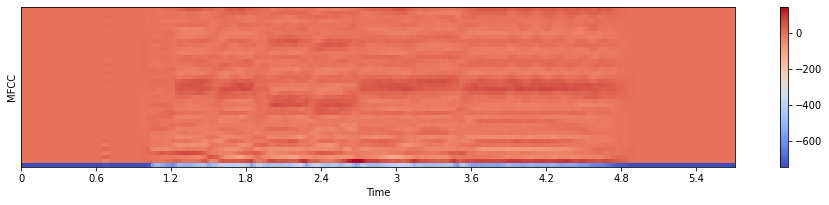

In [10]:
# plotting spec show using mfcc for random audio file (Emotion - Calm)
path = "/content/drive/MyDrive/Almabetter/audio files/song audio files/Actor_02/03-02-02-01-01-01-02.wav"
X, sample_rate = librosa.load(path)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

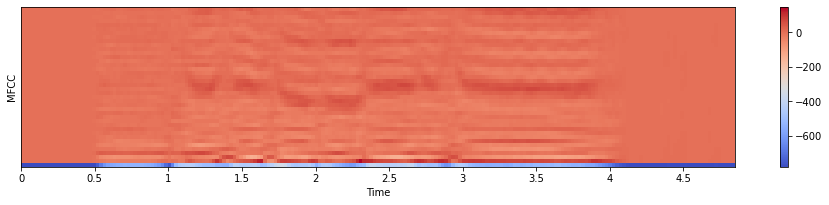

In [11]:
# plotting spec show using mfcc for random audio file (Emotion - Happy)
path = "/content/drive/MyDrive/Almabetter/audio files/song audio files/Actor_06/03-02-03-01-01-01-06.wav"
X, sample_rate = librosa.load(path)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

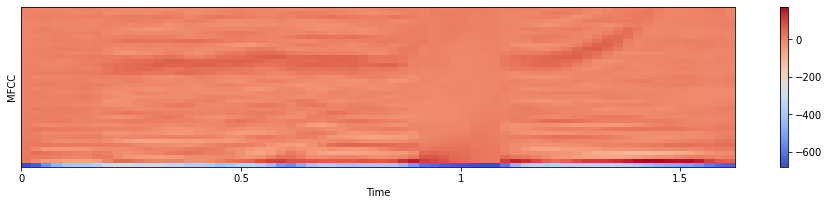

In [12]:
# plotting spec show using mfcc for random audio file (Emotion - Angry)
path = "/content/drive/MyDrive/Almabetter/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav"
X, sample_rate = librosa.load(path)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)
# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [13]:
# splitting data into training and testing dataset

X = audio_data.iloc[:,:40]
y = audio_data['emotion']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
# training data shape
X_train.shape

(3939, 40)

In [15]:
# testing data shape

X_test.shape

(1313, 40)

In [16]:
# will be using standard scaler function in data pipeline before applying some machine learning algorithms

scaler = StandardScaler()


**Models used for training data :**

 
1.  MLP (multilayer perceptron) Model


2.  CNN (Convolutional Neural Network) Model

3. SVC (Support Vector Classifier)








##**SVC Model**

**Without standardization of data, SVC Model Implementation**

In [17]:
# Support vector classifier implementation
clf = SVC(kernel = "rbf",random_state = 42)
clf.fit(X_train, y_train)

SVC(random_state=42)

In [18]:
# without standardization of data, accuracy score is very less

predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.5300837776085301

**Creating data pipeline for preprocessing of data using standard scaler before training data on SVC model**

In [19]:
# applying standard scaler and then implementing standard scaler

pipe_svc = Pipeline(steps=[('standardscaler',scaler),('svc',clf)])
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=42))])

In [20]:
# accuracy score for training data

train_predict = pipe_svc.predict(X_train)
accuracy_score(y_train,train_predict)

0.882965219598883

In [21]:
# accuracy score for testing data
predict = pipe_svc.predict(X_test)
accuracy_score(y_test,predict)


0.8088347296268088

#**MLP Model**

In [22]:
# applying MLP Classifier directly without standardization of data

modelMLP = MLPClassifier(alpha=0.01, batch_size=270, epsilon=1e-08, hidden_layer_sizes=(400,), learning_rate='adaptive', max_iter=400,random_state=42)
modelMLP.fit(X_train,y_train)

MLPClassifier(alpha=0.01, batch_size=270, hidden_layer_sizes=(400,),
              learning_rate='adaptive', max_iter=400, random_state=42)

In [23]:
# Comparing training and testing data score for MLP calssifier without standardization of data

print("Training data score: {:.3f}".format(modelMLP.score(X_train, y_train)))
print("Test data score: {:.3f}".format(modelMLP.score(X_test, y_test)))

Training data score: 0.731
Test data score: 0.676


**Standardizing the data to check if training and test data score improves for MLP Model**

In [24]:
# creating pipeline for standardizing data before applying MLP model

pipe_mlp = Pipeline(steps=[('standardscaler',scaler),('mlp',modelMLP)])
pipe_mlp.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(alpha=0.01, batch_size=270,
                               hidden_layer_sizes=(400,),
                               learning_rate='adaptive', max_iter=400,
                               random_state=42))])

In [25]:
# score for training and testing data for MLP model (after standardization of data)

print("Training data score: {:.3f}".format(pipe_mlp.score(X_train, y_train)))
print("Test data score: {:.3f}".format(pipe_mlp.score(X_test, y_test)))

Training data score: 1.000
Test data score: 0.864


In [26]:
# saving MLP model

filename = "/content/drive/MyDrive/Almabetter/MLP_model.pkl"
save_file =  open(filename,"wb")
joblib.dump(pipe_mlp, save_file)
save_file.close()

#**CNN MODEL**

In [27]:
# standardizing and expanding dimension of training data and testing data for CNN model

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [28]:
# shape of training and testing data features

print(X_train.shape)
print(X_test.shape)


(3939, 40, 1)
(1313, 40, 1)


In [29]:
# CNN Model

model = Sequential()
model.add(Conv1D(64, 5,padding='same',input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tensorflow.keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

In [30]:
# summary of Cnn Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [31]:
# fitting model and comparing training and test data score values.

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history_model = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=150,batch_size=25)
print("\n\nTraining data Loss:{}  , Training data accuracy:{}\n\n".format(model.evaluate(X_train, y_train)[0],model.evaluate(X_train, y_train)[1]))
print("\n\nTest  data Loss: {}, Test data accuracy:{}\n\n".format(model.evaluate(X_test, y_test)[0],model.evaluate(X_test, y_test)[1]))

Epoch 1/150
158/158 [==============================] - 4s 21ms/step - loss: 1.9521 - accuracy: 0.3374 - val_loss: 1.8606 - val_accuracy: 0.3945
Epoch 2/150
158/158 [==============================] - 3s 19ms/step - loss: 1.7213 - accuracy: 0.4354 - val_loss: 1.6617 - val_accuracy: 0.4585
Epoch 3/150
158/158 [==============================] - 3s 19ms/step - loss: 1.5268 - accuracy: 0.4950 - val_loss: 1.5098 - val_accuracy: 0.4699
Epoch 4/150
158/158 [==============================] - 3s 19ms/step - loss: 1.3948 - accuracy: 0.5230 - val_loss: 1.3967 - val_accuracy: 0.5461
Epoch 5/150
158/158 [==============================] - 3s 19ms/step - loss: 1.3032 - accuracy: 0.5565 - val_loss: 1.3215 - val_accuracy: 0.5674
Epoch 6/150
158/158 [==============================] - 3s 19ms/step - loss: 1.2342 - accuracy: 0.5793 - val_loss: 1.2596 - val_accuracy: 0.5796
Epoch 7/150
158/158 [==============================] - 3s 19ms/step - loss: 1.1796 - accuracy: 0.5910 - val_loss: 1.2118 - val_accuracy:

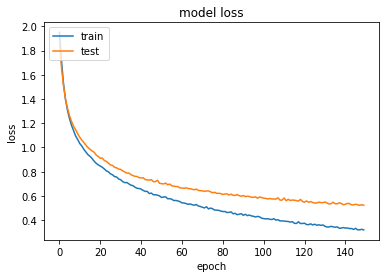

In [32]:
#Plotting model loss VS number of epochs

plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

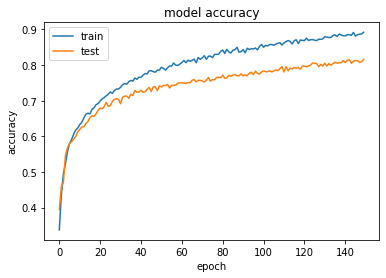

In [33]:
#plotting model accuracy  vs number of epochs

plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Applying early stopping on val_loss**

In [34]:
# to avoid overfitting using early stopping for CNN

earlystopping = callbacks.EarlyStopping(monitor="val_loss",mode = "min",patience=5, restore_best_weights=True, verbose=1)
history_model=model.fit(X_train, y_train, batch_size=64, epochs=150, validation_data=(X_test, y_test),callbacks=[earlystopping])

Epoch 1/150
62/62 [==============================] - 3s 40ms/step - loss: 0.3105 - accuracy: 0.8911 - val_loss: 0.5287 - val_accuracy: 0.8096
Epoch 2/150
62/62 [==============================] - 2s 40ms/step - loss: 0.3117 - accuracy: 0.8931 - val_loss: 0.5210 - val_accuracy: 0.8149
Epoch 3/150
62/62 [==============================] - 2s 40ms/step - loss: 0.3091 - accuracy: 0.8939 - val_loss: 0.5179 - val_accuracy: 0.8180
Epoch 4/150
62/62 [==============================] - 2s 39ms/step - loss: 0.3092 - accuracy: 0.8959 - val_loss: 0.5136 - val_accuracy: 0.8218
Epoch 5/150
62/62 [==============================] - 2s 39ms/step - loss: 0.3038 - accuracy: 0.8934 - val_loss: 0.5183 - val_accuracy: 0.8180
Epoch 6/150
62/62 [==============================] - 2s 39ms/step - loss: 0.2979 - accuracy: 0.9010 - val_loss: 0.5189 - val_accuracy: 0.8203
Epoch 7/150
62/62 [==============================] - 2s 39ms/step - loss: 0.3026 - accuracy: 0.8954 - val_loss: 0.5173 - val_accuracy: 0.8081
Epoch 

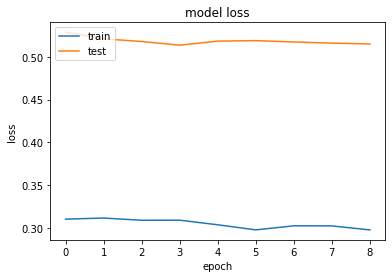

In [35]:
# plotting model loss Vs number of epochs

plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

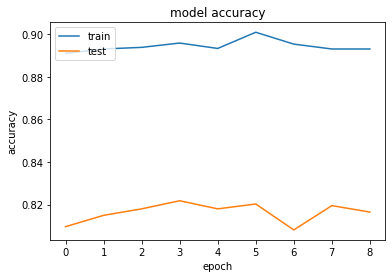

In [36]:
# plotting model accuracy Vs number of epochs

plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
# Training and testing data loss and accuracy values

print("\n\nTraining data Loss:{}  , Training data accuracy:{}\n\n".format(model.evaluate(X_train, y_train)[0],model.evaluate(X_train, y_train)[1]))
print("\n\nTest  data Loss: {}, Test data accuracy:{}\n\n".format(model.evaluate(X_test, y_test)[0],model.evaluate(X_test, y_test)[1]))

124/124 [==============================] - 0s 3ms/step - loss: 0.2462 - accuracy: 0.9325


Training data Loss:0.2462490350008011  , Training data accuracy:0.9324701428413391


42/42 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.8218


Test  data Loss: 0.5136215090751648, Test data accuracy:0.8217821717262268




In [38]:
# predicting test data

predict = model.predict(X_test)
predictions=np.argmax(predict,axis=1)

**Comparing actual and predicted emotions**

In [39]:
# converted numerical labels to descriptive/categorical ones 

dict_values = {0:"neutral",1:"calm",2:"happy",3:"sad",4:"angry",5:"fear",6:"disgust",7:"pleasant surprise"}
prediction_emotion = [dict_values[val] for val in predictions]
y_test_emotion = [dict_values[val] for val in y_test]
results = pd.DataFrame({'Predictions for test data':prediction_emotion,'Actual values for test data':y_test_emotion})
results

,Predictions for test data,Actual values for test data
0,angry,angry
1,sad,sad
2,angry,angry
3,sad,sad
4,fear,fear
...,...,...
1308,neutral,neutral
1309,happy,happy
1310,disgust,disgust
1311,neutral,neutral


In [40]:
# saving model 

filename = '/content/drive/MyDrive/Almabetter/CnnModel.h5'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://2b0e60d9-c875-4efc-9949-bad4904751fc/assets


**Both MLP and CNN models worked well for the data. Now predicting the emotion of random audio file using CNN Model**

####**Detecting emotions for random audio files using CNN Model**

In [41]:
# function to display wave plot

def audio_data(path):
  data, sample_rate = librosa.load(path)
  plt.figure(figsize=(20,5))
  plt.title("Waveplot for above audio is:")
  librosa.display.waveplot(data, sr=sample_rate)

In [42]:
# function to detect emotion using cnn model

def emotion_detection(path):
  data, sample_rate = librosa.load(path)
  arr=[] 
  mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40).T,axis=0) 
  arr.append(mfccs)
  X_test = np.expand_dims(arr, axis=2)
  predict = model.predict(X_test)
  predictions=np.argmax(predict,axis=1)
  detected_emotion = [dict_values[val] for val in predictions]
  print("Detected Emotion for above audio is : {}".format(detected_emotion))
  

In [43]:
# play audio

path = "/content/drive/MyDrive/Almabetter/audio files/speech files/Actor_01/03-01-05-02-02-01-01.wav" 
IPython.display.Audio(path)


Detected Emotion for above audio is : ['sad']


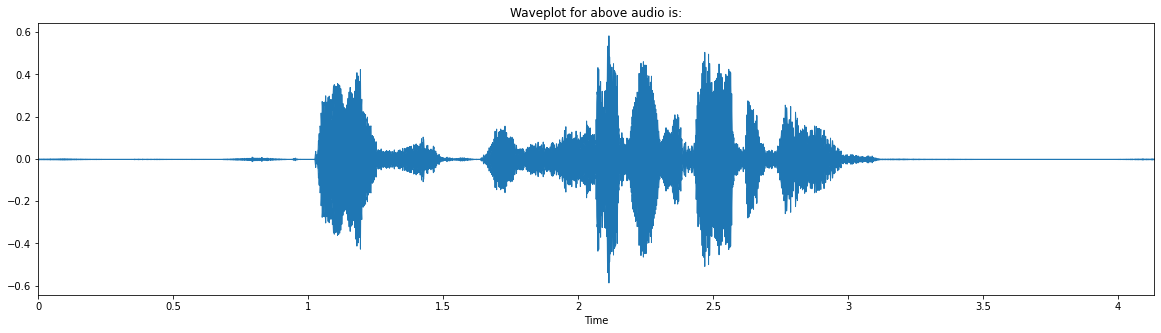

In [44]:
# calling functions to plot wave form and detect emotion for the above audio

audio_data(path)
emotion_detection(path)

In [45]:
# play audio

path = "/content/drive/MyDrive/Almabetter/audio files/song audio files/Actor_08/03-02-06-01-01-02-08.wav"
IPython.display.Audio(path)

Detected Emotion for above audio is : ['sad']


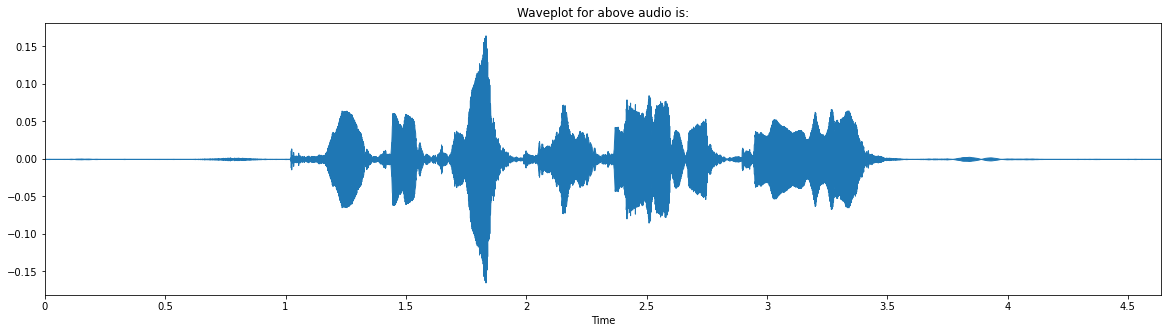

In [46]:
# calling functions to plot wave form and detect emotion for the above audio

audio_data(path)
emotion_detection(path)

In [47]:
# play audio

path = "/content/drive/MyDrive/Almabetter/TESS Toronto emotional speech set data/OAF_disgust/OAF_back_disgust.wav" 
IPython.display.Audio(path)

Detected Emotion for above audio is : ['sad']


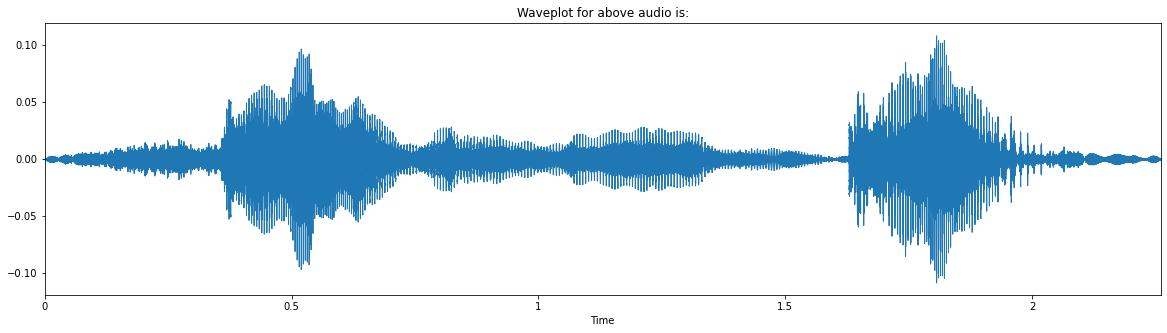

In [48]:
# calling functions to plot wave form and detect emotion for the above audio

audio_data(path)
emotion_detection(path)

In [49]:
# play audio

path = "/content/drive/MyDrive/Almabetter/audio files/speech files/Actor_24/03-01-08-01-02-01-24.wav" 
IPython.display.Audio(path)

Detected Emotion for above audio is : ['sad']


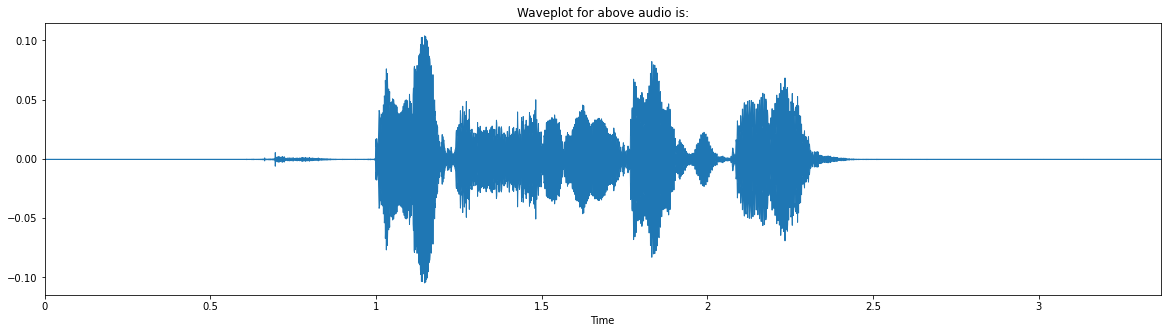

In [50]:
# calling functions to plot wave form and detect emotion for the above audio

audio_data(path)
emotion_detection(path)

In [51]:
# play audio

path = "/content/drive/MyDrive/Almabetter/audio files/speech files/Actor_02/03-01-03-02-01-01-02.wav" 
IPython.display.Audio(path)

Detected Emotion for above audio is : ['sad']


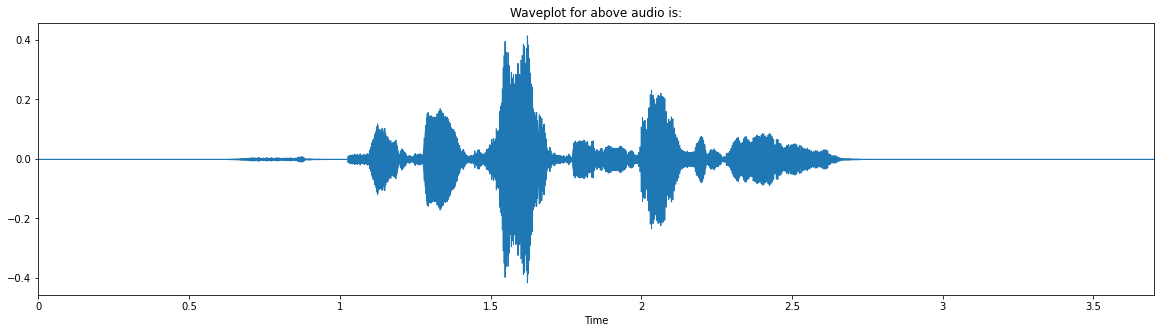

In [52]:
# calling functions to plot wave form and detect emotion for the above audio

audio_data(path)
emotion_detection(path)

**Data was first created by extracting features using MFCC in the load audio data jupyter notebook. In this notebook, we have used that data to train different models.**


**Models used : MLP and CNN**

**Both the models worked well.We tried to randomly select audio file and test if it was predicting correct emotion using CNN as CNN performed much better in testing data as compared to MLP Model.** 
**These models are now saved and will be used for streamlit app.**
